## ML Exersize 1

### Machine Learning Exercise 1: Regression Basics

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [112]:
import sklearn
print(sklearn.__version__)

1.4.2


1. Before building the model, start by looking at a scatterplot of price vs. the square footage of living space. What do you find? How strong does the relationship appear to be?

In [88]:
kc_house_data = pd.read_csv("data/kc_house_data.csv")
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


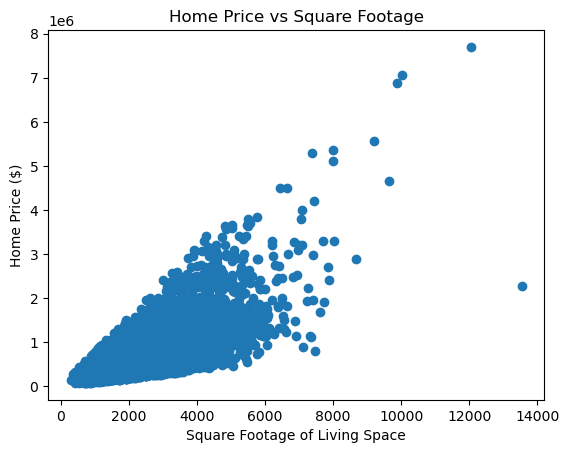

In [11]:
plt.scatter("sqft_living", "price", data=kc_house_data)
plt.xlabel("Square Footage of Living Space")
plt.ylabel("Home Price ($)")
plt.title("Home Price vs Square Footage");

The relationship seems to be strong and linear.

2. Create a DataFrame, X, which contains one column, the sqft_living space and a Series, y, which contains the target variable.

In [111]:
X = kc_house_data[["sqft_living"]]
y = kc_house_data["price"]

print(X.shape)
print(y.shape)

(21613, 1)
(21613,)


3. Use the train_test_split function to create a training and a test set from X and y. Name the resulting pieces X_train, X_test, y_train, and y_test. When you do this, use 30% of the data in the test set. Also, use the random_state parameter so that we can compare model performance as we change the way we build our model.

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

4. Import the LinearRegression class from the linear_model module. Then create a linear regression instance and fit it to the training data.

In [105]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

5. What is the intercept term, and what is the coefficient for sqft_living? How can you interpret how the model is using sqft_living to make predictions? Hint: You can get these values by looking at the .intercept_ and .coef_ attributes of the fit model.

In [106]:
print(f"Intercept: {linreg.intercept_}")
print(f"Coefficient: {linreg.coef_}")

Intercept: -41947.45401876245
Coefficient: [279.51011741]


It looks like the linear regression model is using an increase in sqft_living to indicate an increase in the home price. Specifically, for every square foot of living space, the price increases by $284.12.

6. Use the predict method to generate a set of predictions on y_test. Save the results to y_pred. Question: What type of object is y_pred? What is its shape and how does it compare to y_test?

In [107]:
y_pred = linreg.predict(X_test)
print(type(y_pred))
print("y_pred shape: ", y_pred.shape)
print("y_test shape: ", y_test.shape)

<class 'numpy.ndarray'>
y_pred shape:  (6484,)
y_test shape:  (6484,)


7. Now, we can evaluate how well the model did. There are a number of different metrics that could be used. Let's look at five of them, mean squared error, root mean squared error, mean absolute error, mean absolute percentage error, and R^2 score. For more information on these metrics, see https://developer.nvidia.com/blog/a-comprehensive-overview-of-regression-evaluation-metrics/.

Calculate each metric on the test set. For each one, interpret what the number means.

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score
print("mean squared error: ", mean_squared_error(y_test, y_pred))
print("root mean squared error: ", root_mean_squared_error(y_test, y_pred))
print("mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("mean absolute percentage error: ", mean_absolute_percentage_error(y_test, y_pred))
print("R^2: ", r2_score(y_test, y_pred))

mean squared error:  74509993356.49603
root mean squared error:  272965.1870779423
mean absolute error:  177803.0458452365
mean absolute percentage error:  0.36040933275597725
R^2:  0.48388319278201475


Mean Squared Error: Very large squared error.
Root Mean Squared Error: Kind of but not really average error of $272965.18
Mean Absolute Error: Average error of $177803.05
Mean Absolute Percentage Error: The model is off by 36% on average
R^2: The model is about halfway between a perfect predictor and just taking the average of all values as a predictor, so decent but not great.

8. Create a numpy array that is the same length as y_test which just contains a constant value equal to the mean of the target variable on the training data. Hint: you could use the full_like function from numpy to create this array. Does the model using sqft_living do better than this simple baseline model?

In [109]:
price_avg_array = np.full_like(y_test, kc_house_data["price"].mean())
print("mean squared error: ", mean_squared_error(y_test, price_avg_array))
print("root mean squared error: ", root_mean_squared_error(y_test, price_avg_array))
print("mean absolute error: ", mean_absolute_error(y_test, price_avg_array))
print("mean absolute percentage error: ", mean_absolute_percentage_error(y_test, price_avg_array))
print("R^2: ", r2_score(y_test, price_avg_array))

mean squared error:  144399156265.14728
root mean squared error:  379998.8898209405
mean absolute error:  238276.66103995038
mean absolute percentage error:  0.5347132648410233
R^2:  -0.00022598498918324772


No, this model does not do better. And, as we expected, the R^2 is 0 (or should be, probably isn't due to rounding error).

9. Fit a KNeighborsRegressor to the data using just the square footage of living space and using 5 neighbors. How do the metrics compare to those for the linear regression model?

In [86]:
from sklearn.neighbors import KNeighborsRegressor
neigh_model = KNeighborsRegressor(n_neighbors=5)
neigh_model.fit(X_train, y_train)
neigh_model_pred = neigh_model.predict(X_test)

In [87]:
print("mean squared error: ", mean_squared_error(y_test, neigh_model_pred))
print("root mean squared error: ", root_mean_squared_error(y_test, neigh_model_pred))
print("mean absolute error: ", mean_absolute_error(y_test, neigh_model_pred))
print("mean absolute percentage error: ", mean_absolute_percentage_error(y_test, neigh_model_pred))
print("R^2: ", r2_score(y_test, neigh_model_pred))

mean squared error:  79106304077.70827
root mean squared error:  281258.4293451634
mean absolute error:  185369.05965453427
mean absolute percentage error:  0.3768441758040704
R^2:  0.4520454069018872


The metrics are slightly worse than our linear regression model.

10. We can see how the KNN model has more flexibility than the Linear Regression model by plotting their predictions. Create a DataFrame which includes a range of typical square footage values. Hint: you can use the numpy linspace function. Generate 200 equally spaced values between 500 and 3000. Then generate predictions on these using both the linear regression and KNN model. Plot the predictions. What do you notice?

c:\Users\irela\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\irela\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


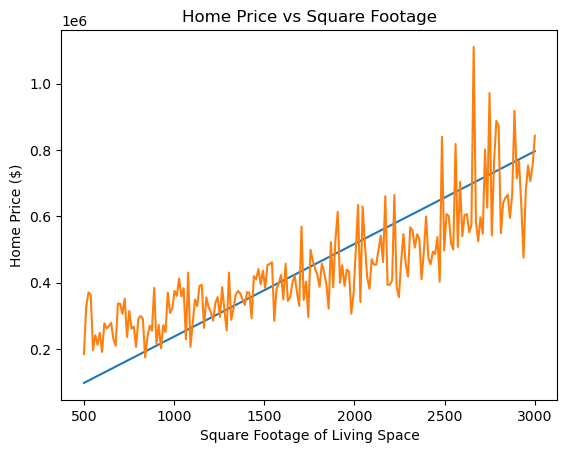

In [83]:
typical_sqft = pd.DataFrame(np.linspace(500, 3000, 200))
typical_pred = linreg.predict(typical_sqft)
typical_knn = neigh_model.predict(typical_sqft)

plt.plot(typical_sqft, typical_pred)
plt.plot(typical_sqft, typical_knn)
plt.xlabel("Square Footage of Living Space")
plt.ylabel("Home Price ($)")
plt.title("Home Price vs Square Footage");


I notice that KNN has a significant amount of variability (almost looks like overfitting.)

11. Finally, let's see what happens when we add another variable. Create a new linear regression model which uses both the square footage of living space and whether or not it is waterfront. When you do this, make sure that you're using the same train and test split by using the same random_state as above. By how much does this improve the model's fit?

In [94]:
X = kc_house_data[["sqft_living", "waterfront"]]
y = kc_house_data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [95]:
linreg_waterfront = LinearRegression()
linreg_waterfront.fit(X_train, y_train)
y_pred_waterfront = linreg_waterfront.predict(X_test)

print("mean squared error: ", mean_squared_error(y_test, y_pred_waterfront))
print("root mean squared error: ", root_mean_squared_error(y_test, y_pred_waterfront))
print("mean absolute error: ", mean_absolute_error(y_test, y_pred_waterfront))
print("mean absolute percentage error: ", mean_absolute_percentage_error(y_test, y_pred_waterfront))
print("R^2: ", r2_score(y_test, y_pred_waterfront))

mean squared error:  67664973042.12078
root mean squared error:  260124.91814918612
mean absolute error:  173728.53303476996
mean absolute percentage error:  0.35537307333512475
R^2:  0.5312973700064663


Yes, our model has improved slightly!

STRETCH GOALS

1. One way to add complexity to the model is through using interaction terms. These allow for the relationship between sqft_living and price to differ for waterfront and non-waterfront properties. Create a column containing the product of sqft_living and waterfront. Add this to your model. Does it improve the performance? Interpret the meaning of the coefficients for the model containing the interaction.

In [97]:
kc_house_data['wf_sqft'] = kc_house_data["waterfront"] * kc_house_data["sqft_living"]

In [99]:
X = kc_house_data[["sqft_living", "waterfront", "wf_sqft"]]
y = kc_house_data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [101]:
linreg_waterfront_interaction = LinearRegression()
linreg_waterfront_interaction.fit(X_train, y_train)
y_pred_waterfront_interaction = linreg_waterfront_interaction.predict(X_test)

print("mean squared error: ", mean_squared_error(y_test, y_pred_waterfront_interaction))
print("root mean squared error: ", root_mean_squared_error(y_test, y_pred_waterfront_interaction))
print("mean absolute error: ", mean_absolute_error(y_test, y_pred_waterfront_interaction))
print("mean absolute percentage error: ", mean_absolute_percentage_error(y_test, y_pred_waterfront_interaction))
print("R^2: ", r2_score(y_test, y_pred_waterfront_interaction))

mean squared error:  64810313257.05285
root mean squared error:  254578.69757120853
mean absolute error:  171114.8918496382
mean absolute percentage error:  0.3528352263541192
R^2:  0.5510710651524797


In [102]:
print(f"Intercept: {linreg_waterfront_interaction.intercept_}")
print(f"Coefficient: {linreg_waterfront_interaction.coef_}")

Intercept: -17996.811689299182
Coefficient: [    265.24266825 -206141.19629211     329.78290053]


Again, our model has improved slightly! According to our model's coefficients, the price of homes increases by $265.24 per square foot, while being on the waterfront drops the overall price by $206141.20, but then every square foot of living space increases the price by another $329.78.

2. Take a look at the distribution of home prices. You'll find that it's highly skewed. When the target is skewed, it can be beneficial to transform the target so that it is closer to normally-distributed in order to reduce the effect of extreme values. Important Note: When comparing metrics for a transformed target and an untransformed target, it is important that you apply an inverse transformation to the predictions from the transformed model. This can be done using a TransformedTargetRegressor. Try using a log transformation on the target. Does this improve the metrics for the model?